In [319]:
import pandas as pd
import os 

In [320]:
#Leer la carpeta "batches"
path = "../batches"
files = os.listdir(path)
#Leer los archivos de la carpeta "batches"
df = pd.concat([pd.read_csv(os.path.join(path, file)) for file in files])
#Guardar el archivo en formato csv
df.to_csv("../batches/batches_concatenate.csv", index=False)

In [321]:
df.head()

,index,Formula,Phase,Elem1,Elem2,Elem3,Elem4,Elem5,Elem6,Elem7,Elem8,CantElemen,Compo1,Compo2,Compo3,Compo4,Compo5,Compo6,Compo7,Compo8
0,29.0,Al40Cu60T,CRA,Al,Cu,0,0,0,0,0,0,2,40.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92.0,Al90Ni10,CRA,Al,Ni,0,0,0,0,0,0,2,90.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,Al92La8,RMG,Al,La,0,0,0,0,0,0,2,92.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109.0,Al93Ce7,RMG,Al,Ce,0,0,0,0,0,0,2,93.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128.0,Al98.9Ti1.1,CRA,Al,Ti,0,0,0,0,0,0,2,98.9,1.1,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
#Leer el archivo de "TablaPeriodica.csv"
df_tabla_periodica = pd.read_csv("../Inputs/TablaPeriodica.csv", sep=";")
df_tabla_periodica.head()

,Element,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,...,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
0,Ag,1.3040,7.576,2.145.411,1234.93,107.87,47,0.1445,0.145,11,...,10,1.93,1.83,25.350,429.0,4.64,10.50,11.30,18.005,2435.15
1,Al,0.4328,5.986,1.882.883,933.47,2.698.154,13,0.1432,0.121,13,...,0,1.61,1.37,24.200,237.0,4.19,2.70,10.79,16.472,2792.15
2,Au,2.3090,9.226,2.052.132,1337.33,196.97,79,0.1442,0.136,11,...,10,2.54,2.33,25.418,317.0,5.32,19.30,12.55,18.145,3129.15
3,B,0.2800,8.298,2.515.521,2349.15,10.81,5,0.0820,0.084,13,...,0,2.04,1.77,11.087,27.0,4.75,2.34,50.20,86.991,4200.15
4,Ba,0.1450,5.212,1.000.363,1000.15,137.33,56,0.2176,0.215,2,...,0,0.89,1.17,28.070,18.4,2.35,3.62,7.75,63.643,2170.15


In [323]:
for i in range(1, 9):
    # Realizar el "merge" entre df1 y df2 en función de las columnas de elementos
    df = df.merge(df_tabla_periodica, left_on=f"Elem{i}", right_on="Element", how="left")
print('Cantidad de registros:', len(df))
print('Cantidad de columnas:', len(df.columns))

Cantidad de registros: 6415
Cantidad de columnas: 212


C:\Users\Luis\AppData\Local\Temp\ipykernel_22312\364328701.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'I1 (ev)_x', 'sVEC_x', 'W_x', 'D_x', 'pVEC_x', 'K (W/m)/K 300K_x', 'VEC_x', 'Rc (nm)_x', 'I2 (ev)_x', 'LP_x', 'Hf (kJ/mol)_x', 'XP_x', 'Element_x', 'Tb (K)_x', 'Gp_x', 'XM_x', 'P_x', 'Eea (ev)_x', 'AN_x', 'Tm (K)_x', 'AW_x', 'dVEC_x', 'Cp (J/molK)_x', 'Rm (nm)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_tabla_periodica, left_on=f"Elem{i}", right_on="Element", how="left")
C:\Users\Luis\AppData\Local\Temp\ipykernel_22312\364328701.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'I1 (ev)_x', 'sVEC_x', 'W_x', 'D_x', 'pVEC_x', 'K (W/m)/K 300K_x', 'VEC_x', 'Rc (nm)_x', 'I2 (ev)_x', 'LP_x', 'Hf (kJ/mol)_x', 'XP_x', 'Element_x', 'Tb (K)_x', 'Gp_x', 'XM_x', 'P_x', 'Eea (ev)_x', 'AN_x', 'Tm (K)_x', 'AW_x', 'dVEC_x', 'Cp (J/molK)_x', 'Rm (nm)_x'} in the result is deprecated and will raise a 

In [324]:
#Eliminar las columnas que no se necesitan
df = df.drop(columns=["Elem1", "Elem2", "Elem3", "Elem4", "Elem5", "Elem6", "Elem7", "Elem8", "Element_x", "index", "Formula", "CantElemen"])

In [340]:
df_total = df.copy()

In [341]:
#Tipos de la columna "Phase"
print(df_total["Phase"].unique())
#Reemplazar BMG por 0, RMG por 1 y CRA por 2
df_total["Phase"] = df_total["Phase"].replace({"BMG": 0, "RMG": 1, "CRA": 2})
#Tipos de la columna "Phase"
print(df_total["Phase"].unique())

['CRA' 'RMG' 'BMG']
[2 1 0]


In [342]:
#La etiqueta de la columna "Phase"
y = df_total["Phase"]
#Las características de las columnas
X = df_total.drop(columns=["Phase"])


In [343]:
from sklearn.model_selection import train_test_split
#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [344]:
#Convertir el X_train y X_test en números
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [345]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\Luis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Luis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Luis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [346]:
#Fillna
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(0)
X_test_scaled = pd.DataFrame(X_test_scaled).fillna(0)

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Crear el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
#Entrenar el modelo
model.fit(X_train_scaled, y_train)
#Predecir con el modelo
y_pred = model.predict(X_test_scaled)

Accuracy score:  0.8168355416991426
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       229
           1       0.78      0.94      0.85       726
           2       0.79      0.46      0.58       328

    accuracy                           0.82      1283
   macro avg       0.85      0.78      0.80      1283
weighted avg       0.82      0.82      0.80      1283

Matriz de confusión: 
[[212  17   0]
 [  0 685  41]
 [  1 176 151]]


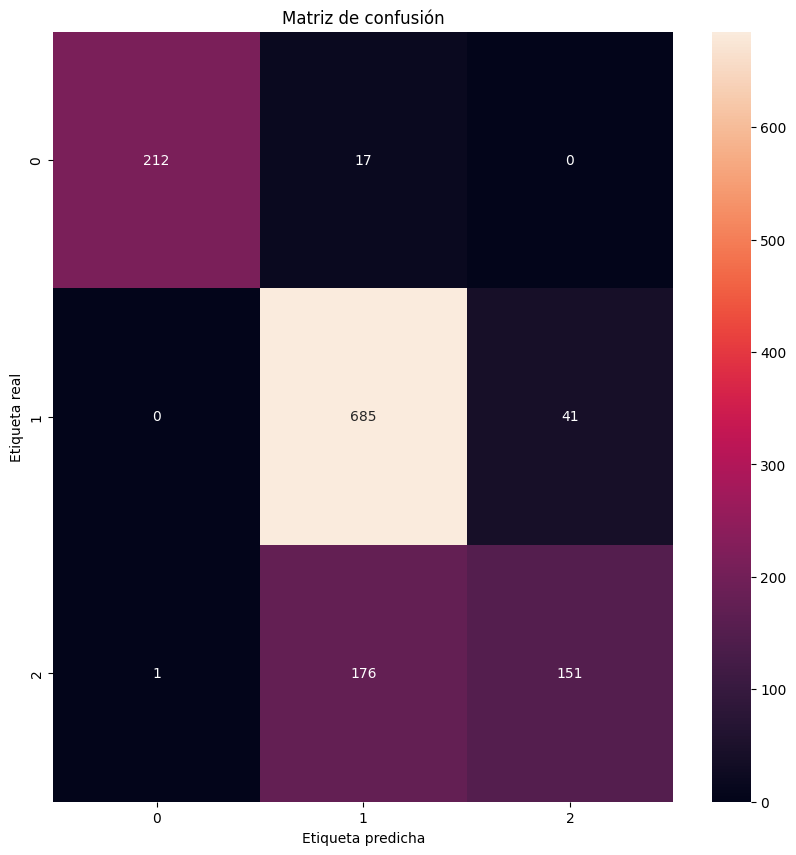

In [348]:
#Calcular la precisión del modelo
print('Accuracy score: ', accuracy_score(y_test, y_pred))
#Reporte de clasificación
print('Reporte de clasificación: ')
print(classification_report(y_test, y_pred))

#Matriz de confusión
print('Matriz de confusión: ')
print(confusion_matrix(y_test, y_pred))

#Gráficar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Matriz de confusión")
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

Text(0.5, 1.0, "Histograma de VP's")

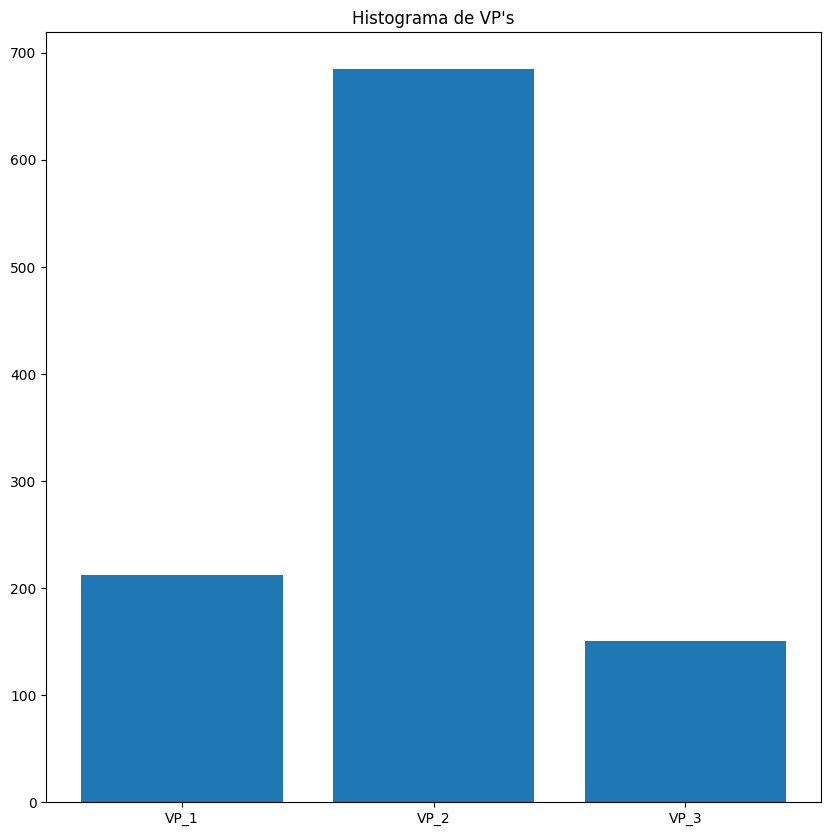

In [349]:
#Extraer los VP y VN, FP y FN de la primera etiequta
VP_1 = confusion_matrix(y_test, y_pred)[0][0]
VN_1 = confusion_matrix(y_test, y_pred)[0][1]
FP_1 = confusion_matrix(y_test, y_pred)[1][0]
FN_1 = confusion_matrix(y_test, y_pred)[1][1]

#Extraer los VP y VN, FP y FN de la segunda etiequta
VP_2 = confusion_matrix(y_test, y_pred)[1][1]
VN_2 = confusion_matrix(y_test, y_pred)[1][0]
FP_2 = confusion_matrix(y_test, y_pred)[0][1]
FN_2 = confusion_matrix(y_test, y_pred)[0][0]

#Extraer los VP y VN, FP y FN de la tercera etiequta
VP_3 = confusion_matrix(y_test, y_pred)[2][2]
VN_3 = confusion_matrix(y_test, y_pred)[2][0]
FP_3 = confusion_matrix(y_test, y_pred)[0][2]
FN_3 = confusion_matrix(y_test, y_pred)[0][0]


#Realizar un histograma de VP's, donde estos son el eje Y y las etiquetas son el eje X
plt.figure(figsize=(10, 10))
plt.bar(["VP_1", "VP_2", "VP_3"], [VP_1, VP_2, VP_3])
plt.title("Histograma de VP's")

In [350]:
#Guardado del modelo
import pickle
pickle.dump(model, open("../model/model.pkl", "wb"))
